In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.tree import plot_tree, export_graphviz
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# 1. Base de dados com contações após 1, 2, 3, 4 e 5 anos

In [2]:
df = pd.read_csv('Datasets/transformation_disc_result_SD.csv')

In [3]:
df = shuffle(df)

In [4]:
x = df.drop('Open_dif_disc', axis=1)
y = df['Open_dif_disc']

## 1. Seleção dos atributos mais significativos (no mínimo 5)

In [5]:
rfecv = RFECV(DecisionTreeClassifier(max_depth=5), min_features_to_select=5, cv=5)

In [6]:
x_r = rfecv.fit_transform(x,y)

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


## 2. Aplicação de validação cruzada

In [7]:
cv_result = cross_validate(DecisionTreeClassifier(), x, y, scoring='accuracy', cv=5)

In [8]:
cv_result

{'fit_time': array([0.31154704, 0.25696254, 0.24227905, 0.24466705, 0.2752223 ]),
 'score_time': array([0.00410032, 0.00302076, 0.00299287, 0.00500226, 0.00404835]),
 'test_score': array([0.74649235, 0.73788265, 0.74840561, 0.75255102, 0.73779904])}

## 3. Execução individual

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [10]:
tree = DecisionTreeClassifier()

In [11]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred = tree.predict(x_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79      1202
         1.0       0.66      0.65      0.65      1204
         2.0       0.62      0.63      0.62      1173
         3.0       0.79      0.78      0.78      1125

    accuracy                           0.71      4704
   macro avg       0.71      0.71      0.71      4704
weighted avg       0.71      0.71      0.71      4704



In [14]:
matrix = confusion_matrix(y_test, y_pred)
print("0 | {}".format(matrix[0]))
print("1 | {}".format(matrix[1]))
print("2 | {}".format(matrix[2]))
print("3 | {}".format(matrix[3]))

0 | [943 134  92  33]
1 | [147 783 225  49]
2 | [ 82 198 744 149]
3 | [ 27  76 147 875]


In [15]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [16]:
print("YEAR 1")
one_year = x_test[x_test['years_dif'] == 1].index.values
print(classification_report(y_test[one_year], y_pred[one_year]))

print("YEAR 2")
two_years = x_test[x_test['years_dif'] == 2].index.values
print(classification_report(y_test[two_years], y_pred[two_years]))

print("YEAR 3")
three_years = x_test[x_test['years_dif'] == 3].index.values
print(classification_report(y_test[three_years], y_pred[three_years]))

print("YEAR 4")
four_years = x_test[x_test['years_dif'] == 4].index.values
print(classification_report(y_test[four_years], y_pred[four_years]))

print("YEAR 5")
five_years = x_test[x_test['years_dif'] == 5].index.values
print(classification_report(y_test[five_years], y_pred[five_years]))

YEAR 1
              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68       378
         1.0       0.65      0.64      0.64       534
         2.0       0.57      0.63      0.60       405
         3.0       0.60      0.54      0.57       140

    accuracy                           0.63      1457
   macro avg       0.63      0.62      0.62      1457
weighted avg       0.64      0.63      0.63      1457

YEAR 2
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       303
         1.0       0.65      0.66      0.66       282
         2.0       0.58      0.53      0.56       301
         3.0       0.64      0.67      0.65       240

    accuracy                           0.67      1126
   macro avg       0.67      0.67      0.67      1126
weighted avg       0.67      0.67      0.67      1126

YEAR 3
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       225


## 4. Novamente a execução do treinamento com árvore de decisão
Após a execução, uma visualização gráfica da árvore é gerada.

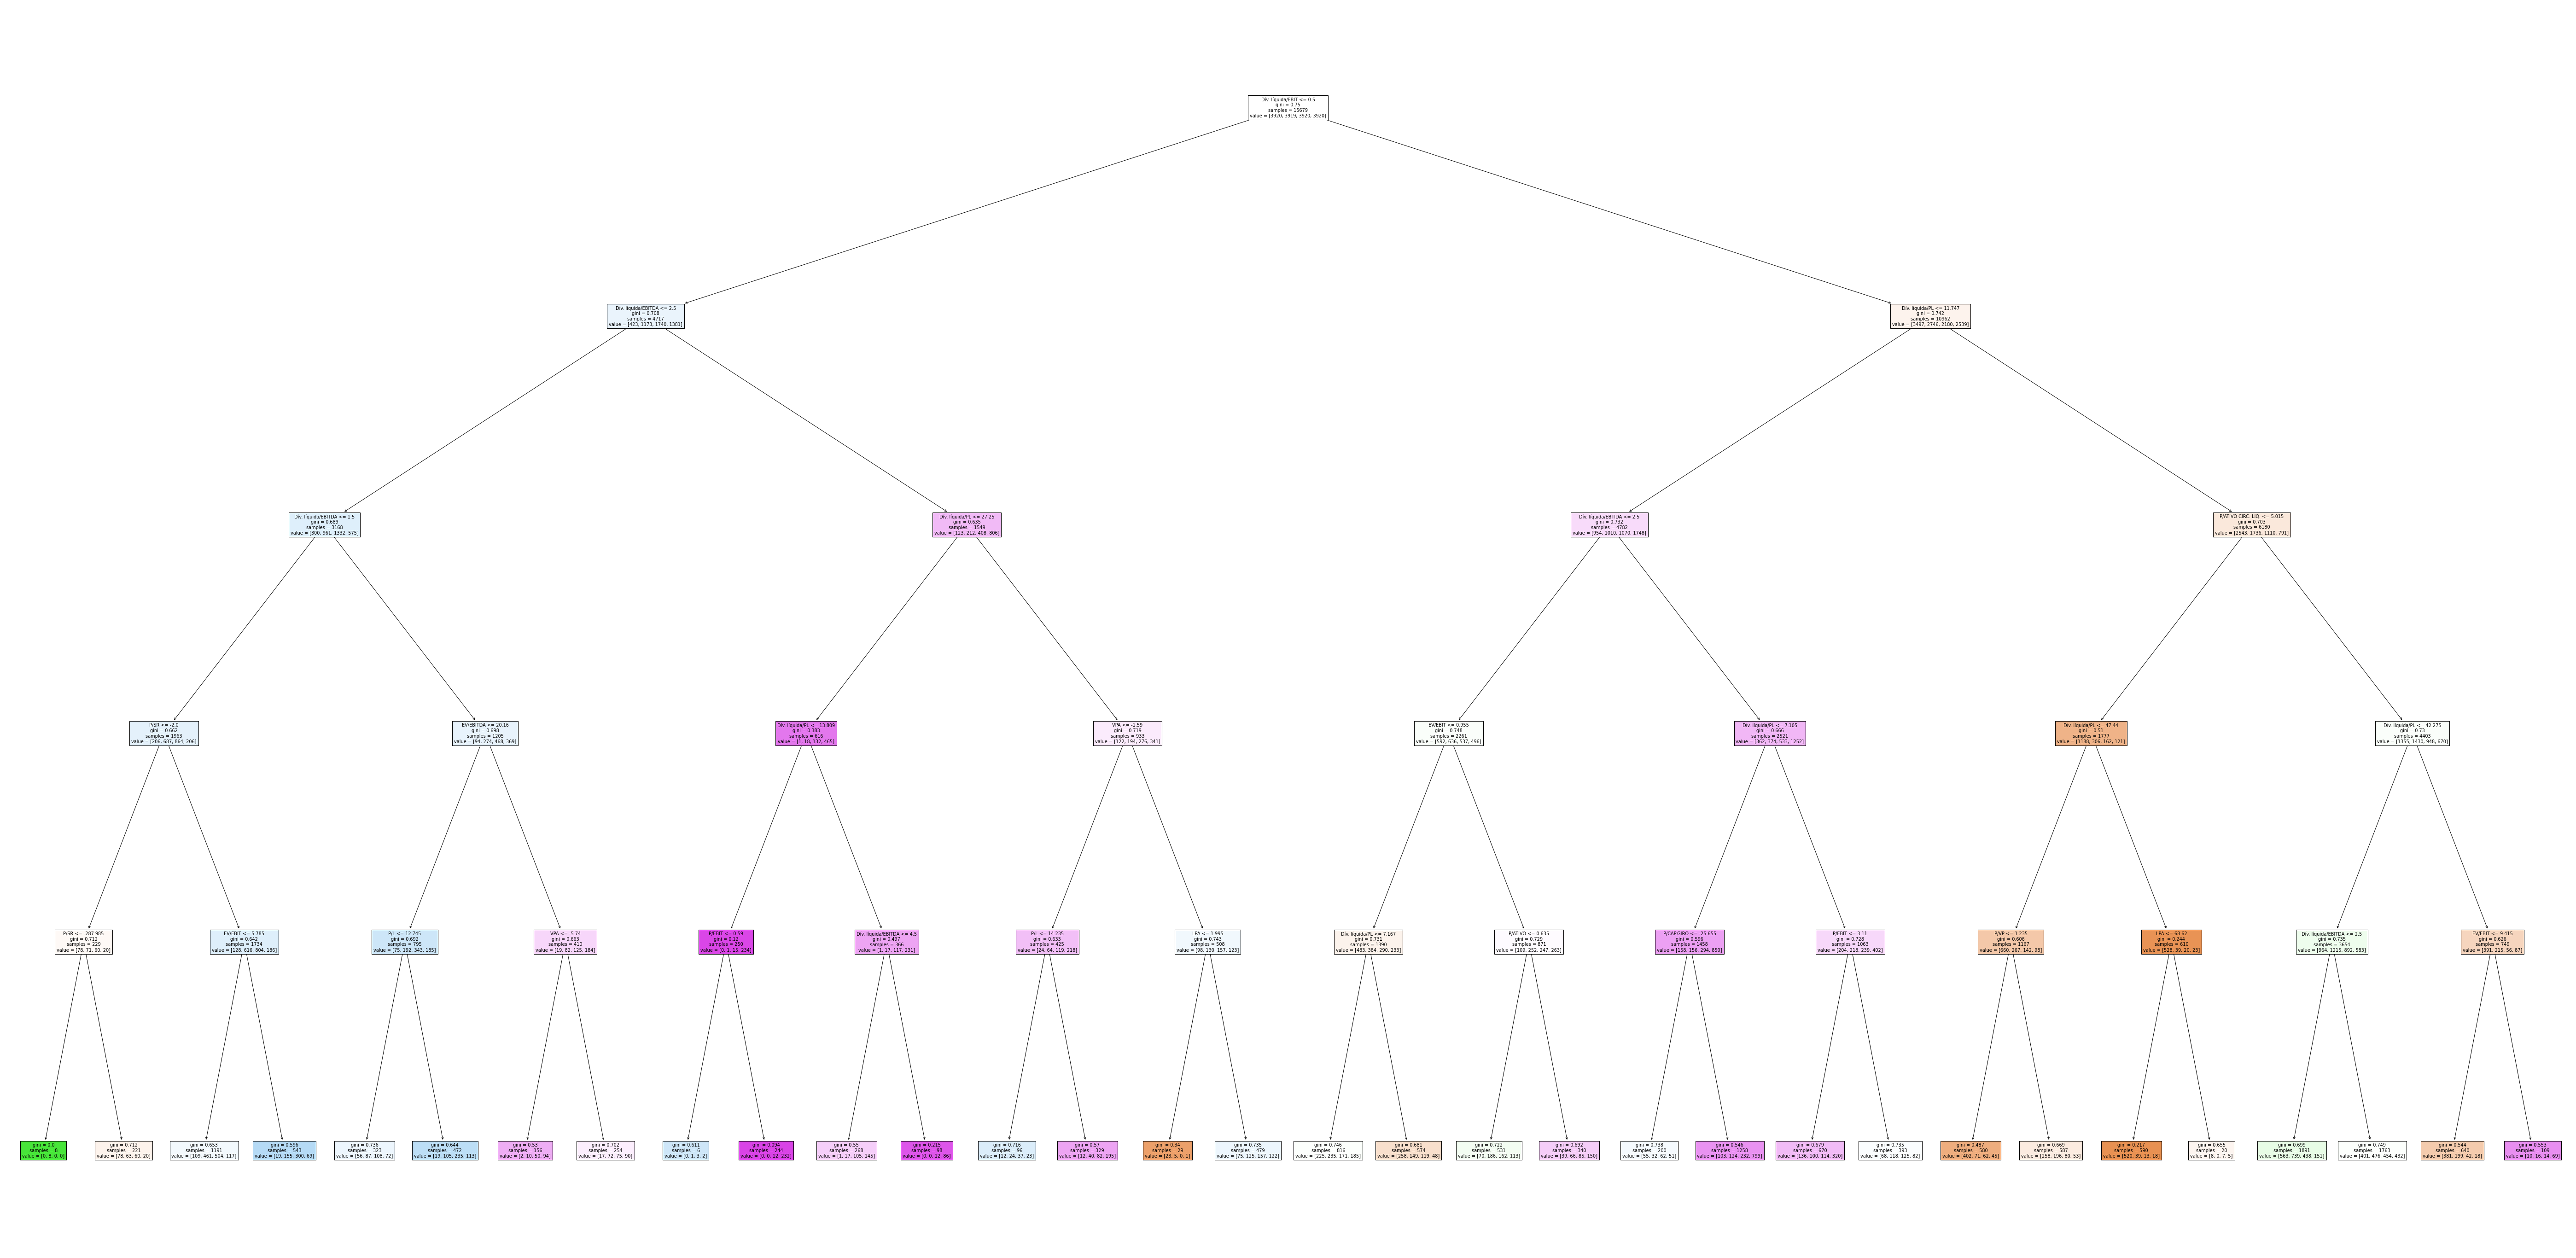

In [17]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_r,y)

fig = plt.figure(figsize=(100,50))
_ = plot_tree(tree, 
                   feature_names=x.columns,  
                   filled=True)
plt.savefig("Trees\\tree.jpeg", bbox_inches='tight')

# 2. Toda a rotina é repetida para as demais base de dados

In [18]:
dfs = [shuffle(pd.read_csv('Datasets/transformation_disc_result_1_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_2_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_3_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_4_year_SD.csv')),
       shuffle(pd.read_csv('Datasets/transformation_disc_result_5_year_SD.csv'))]

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


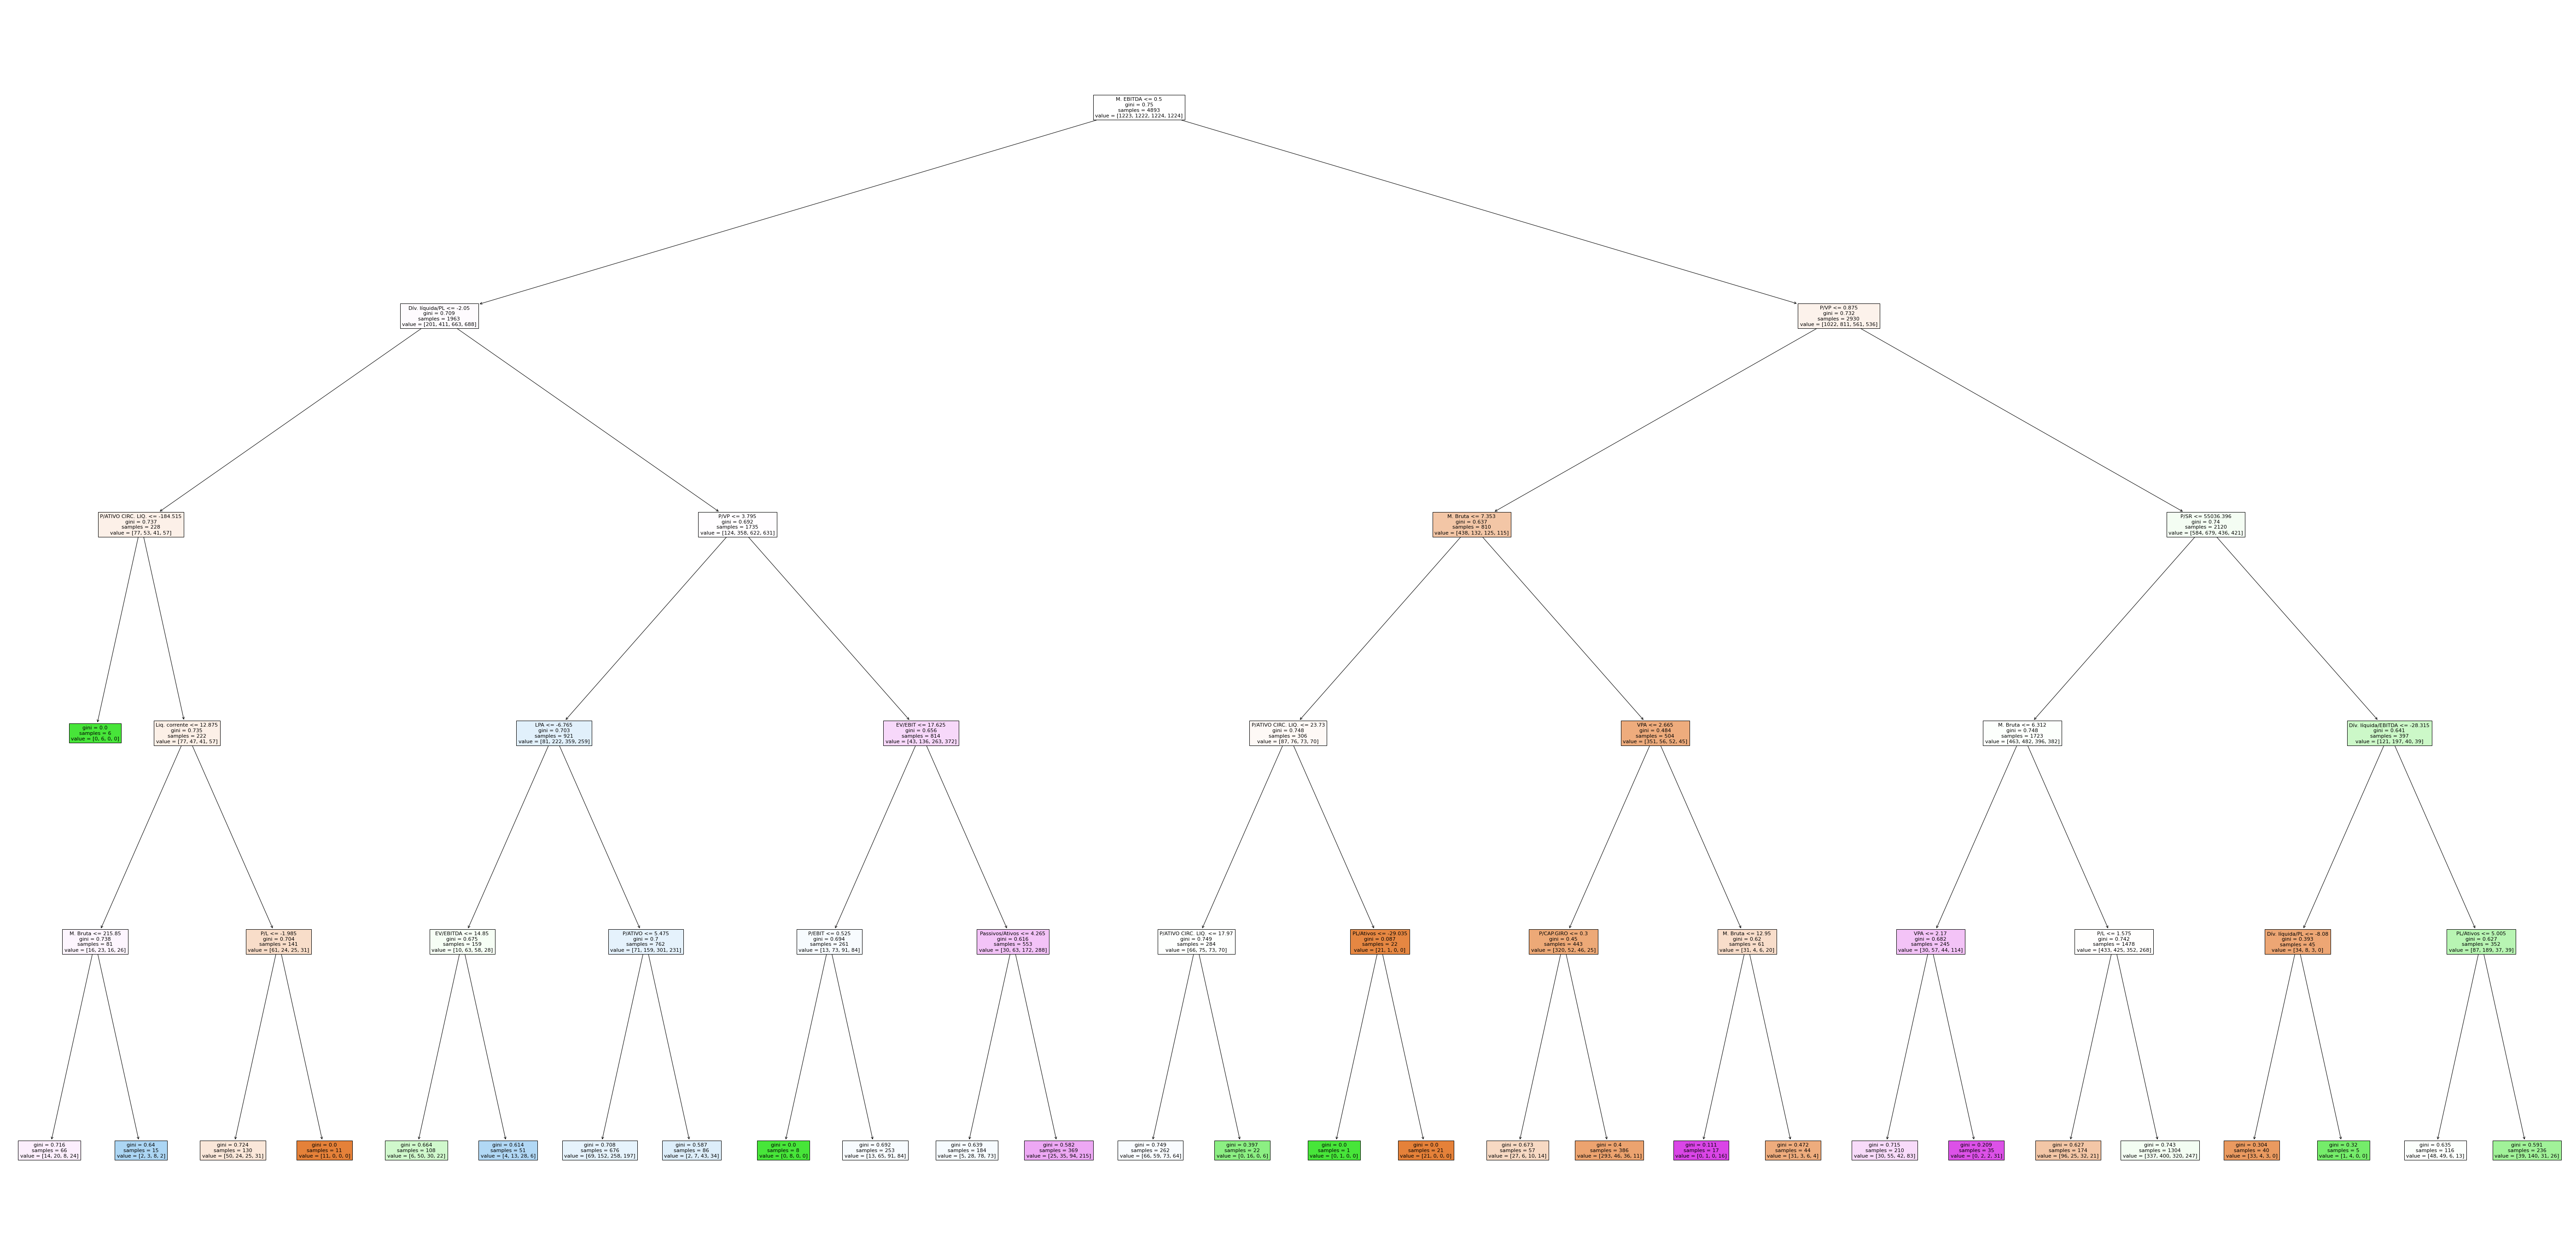

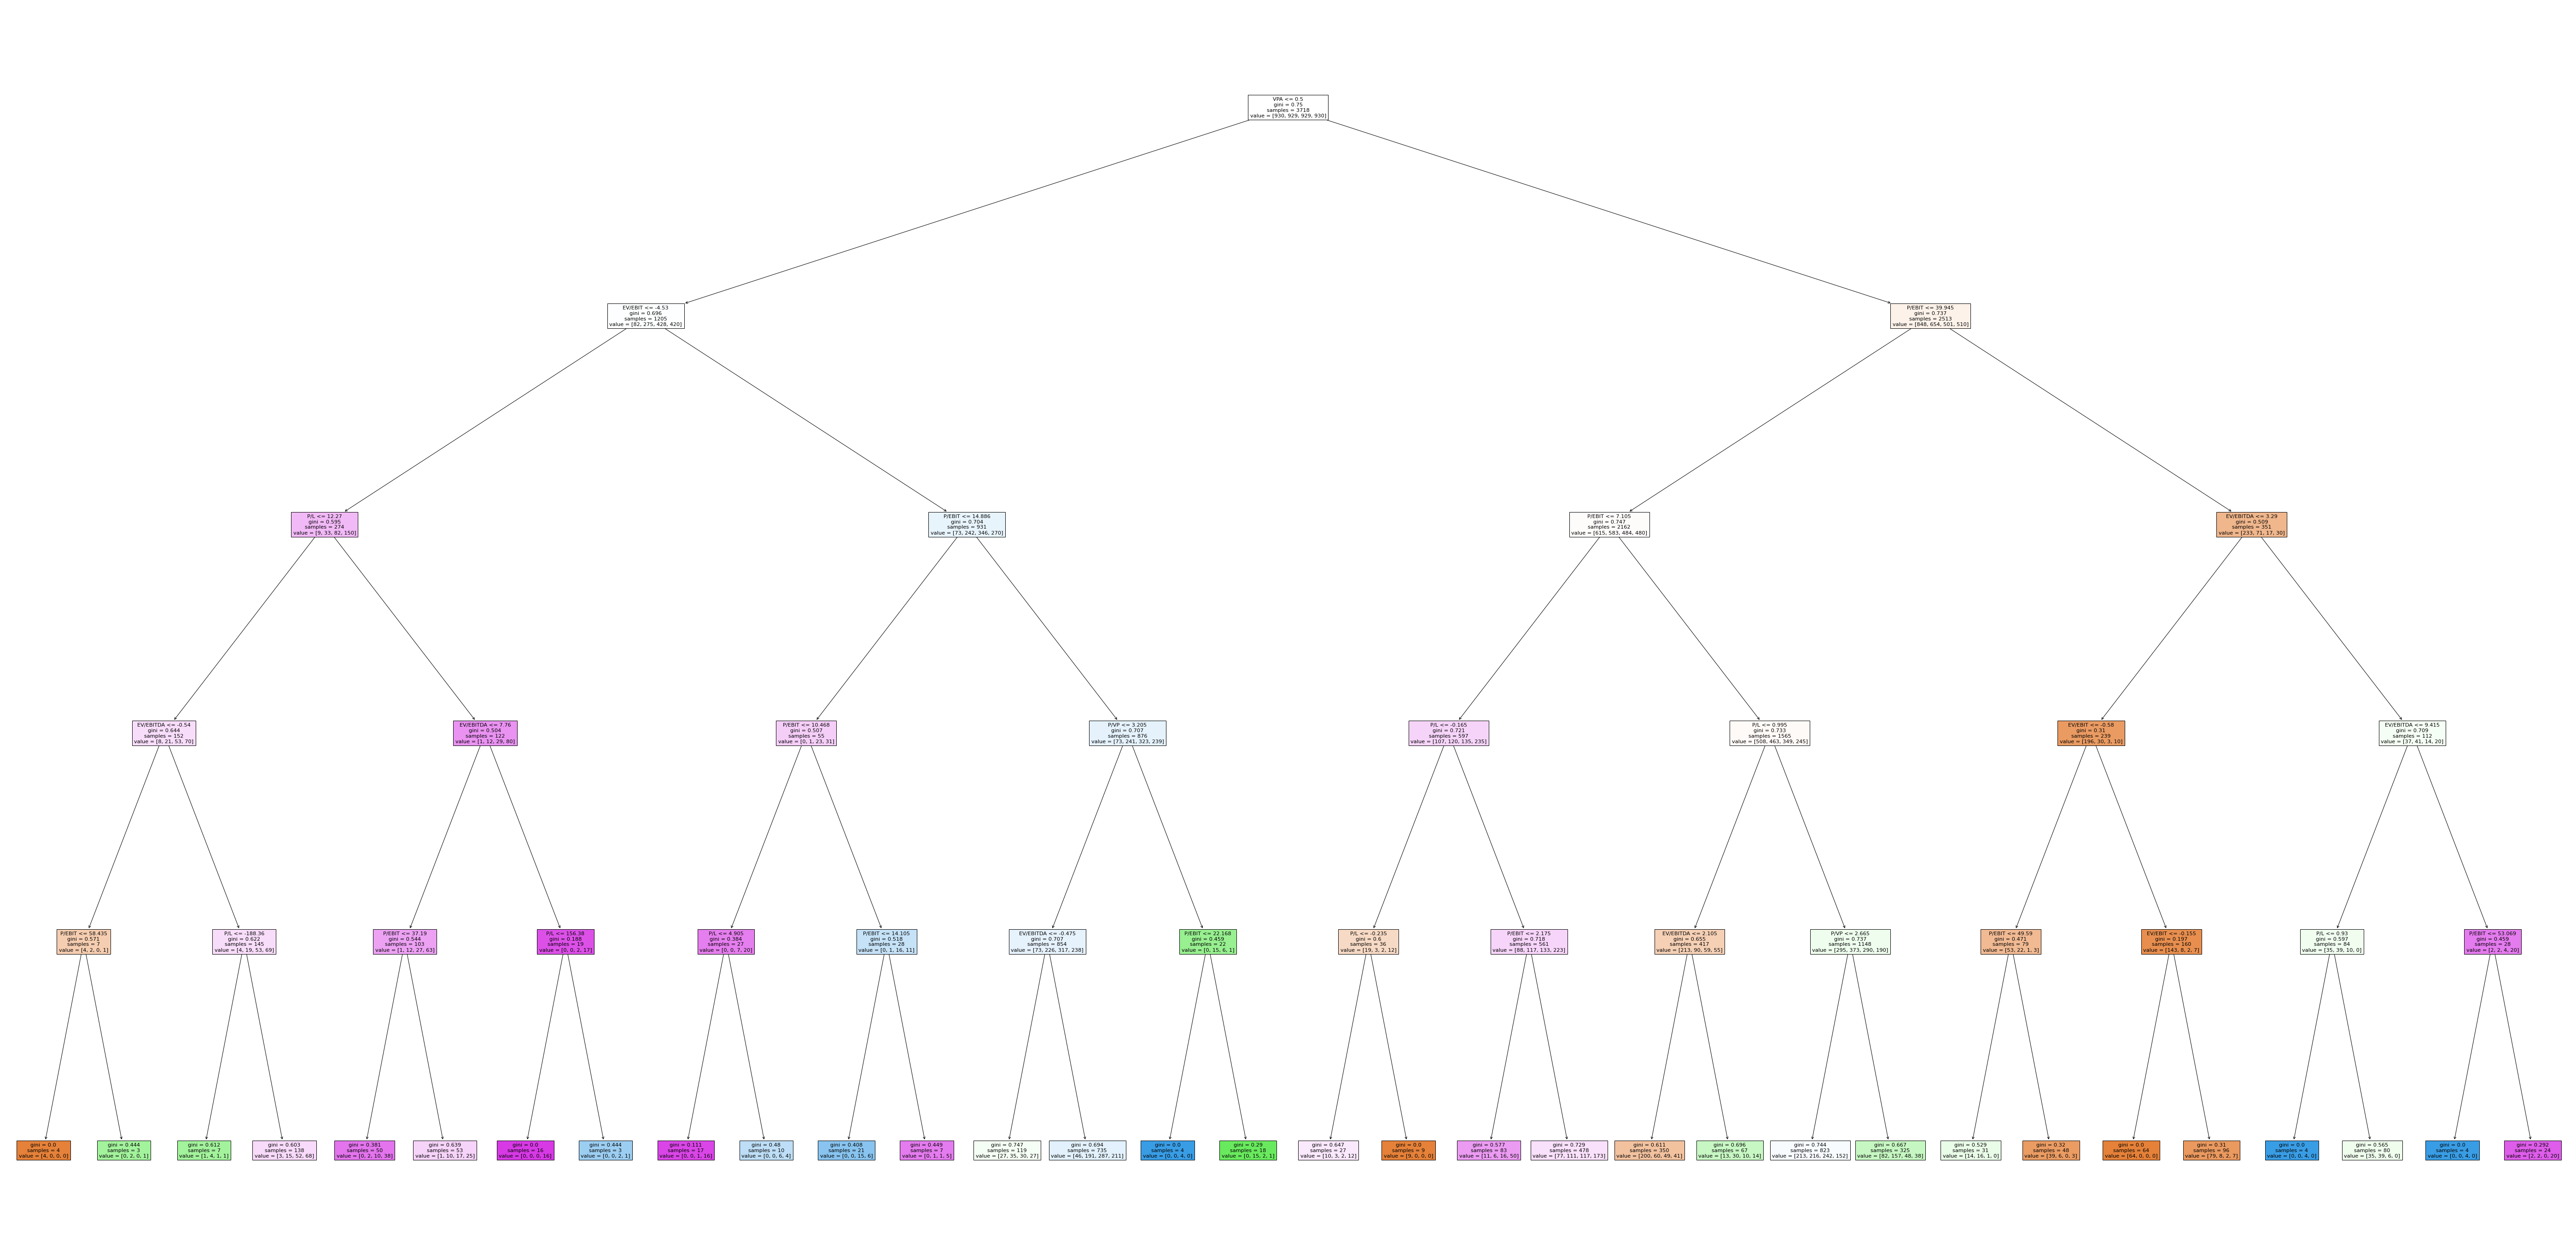

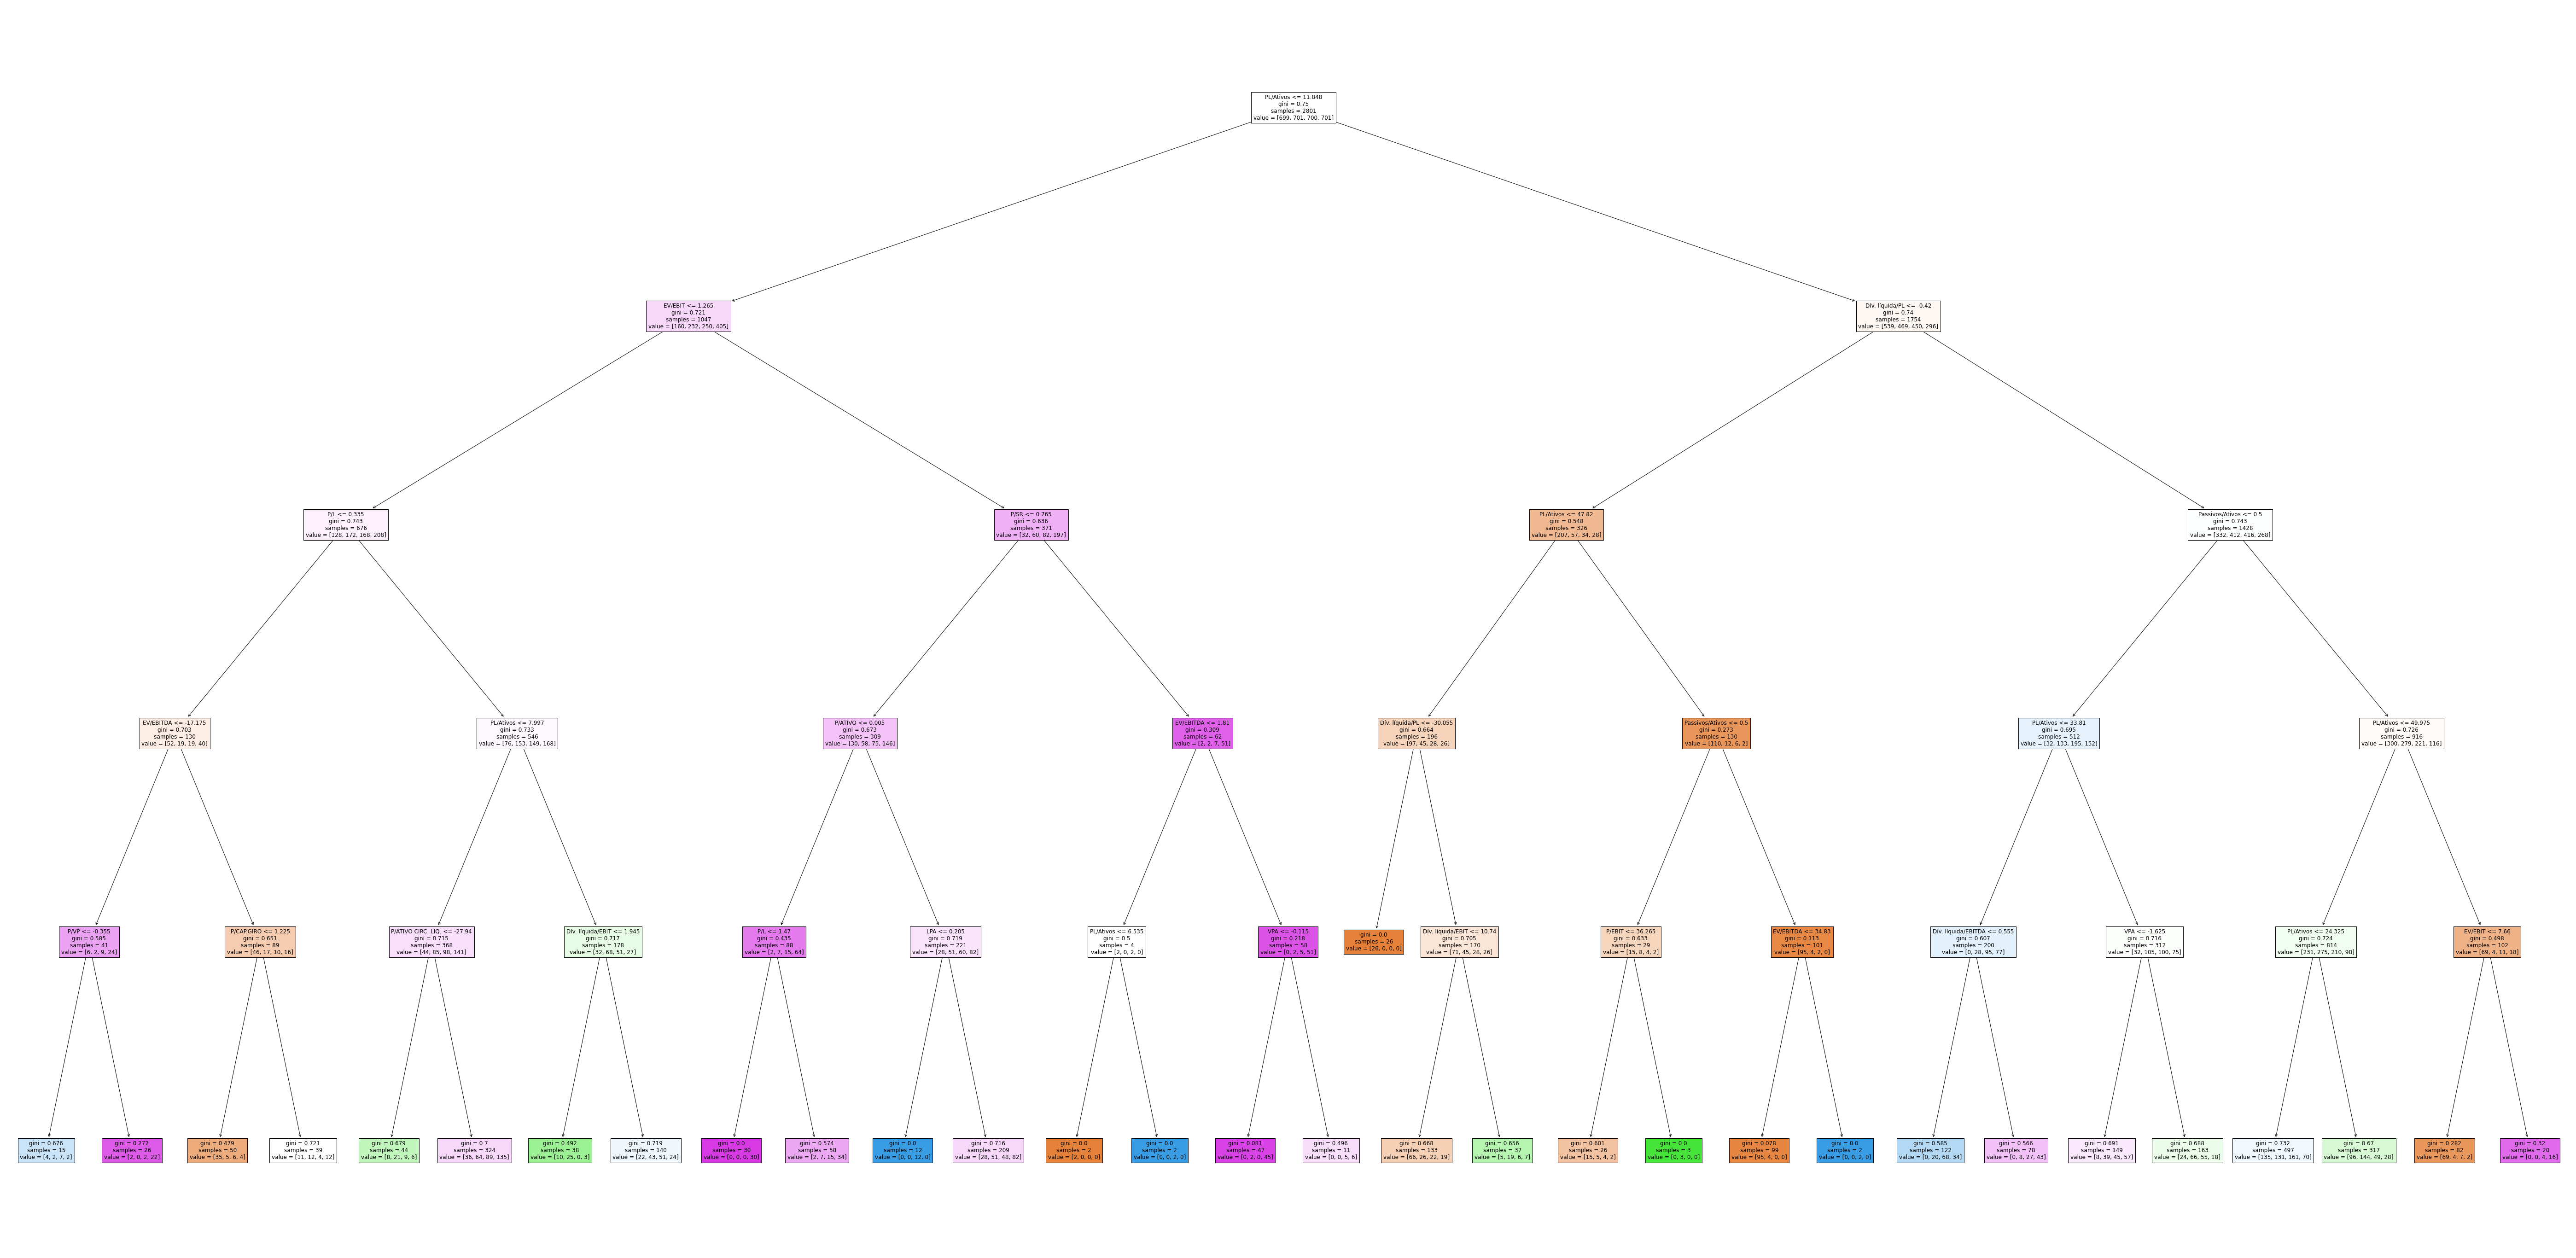

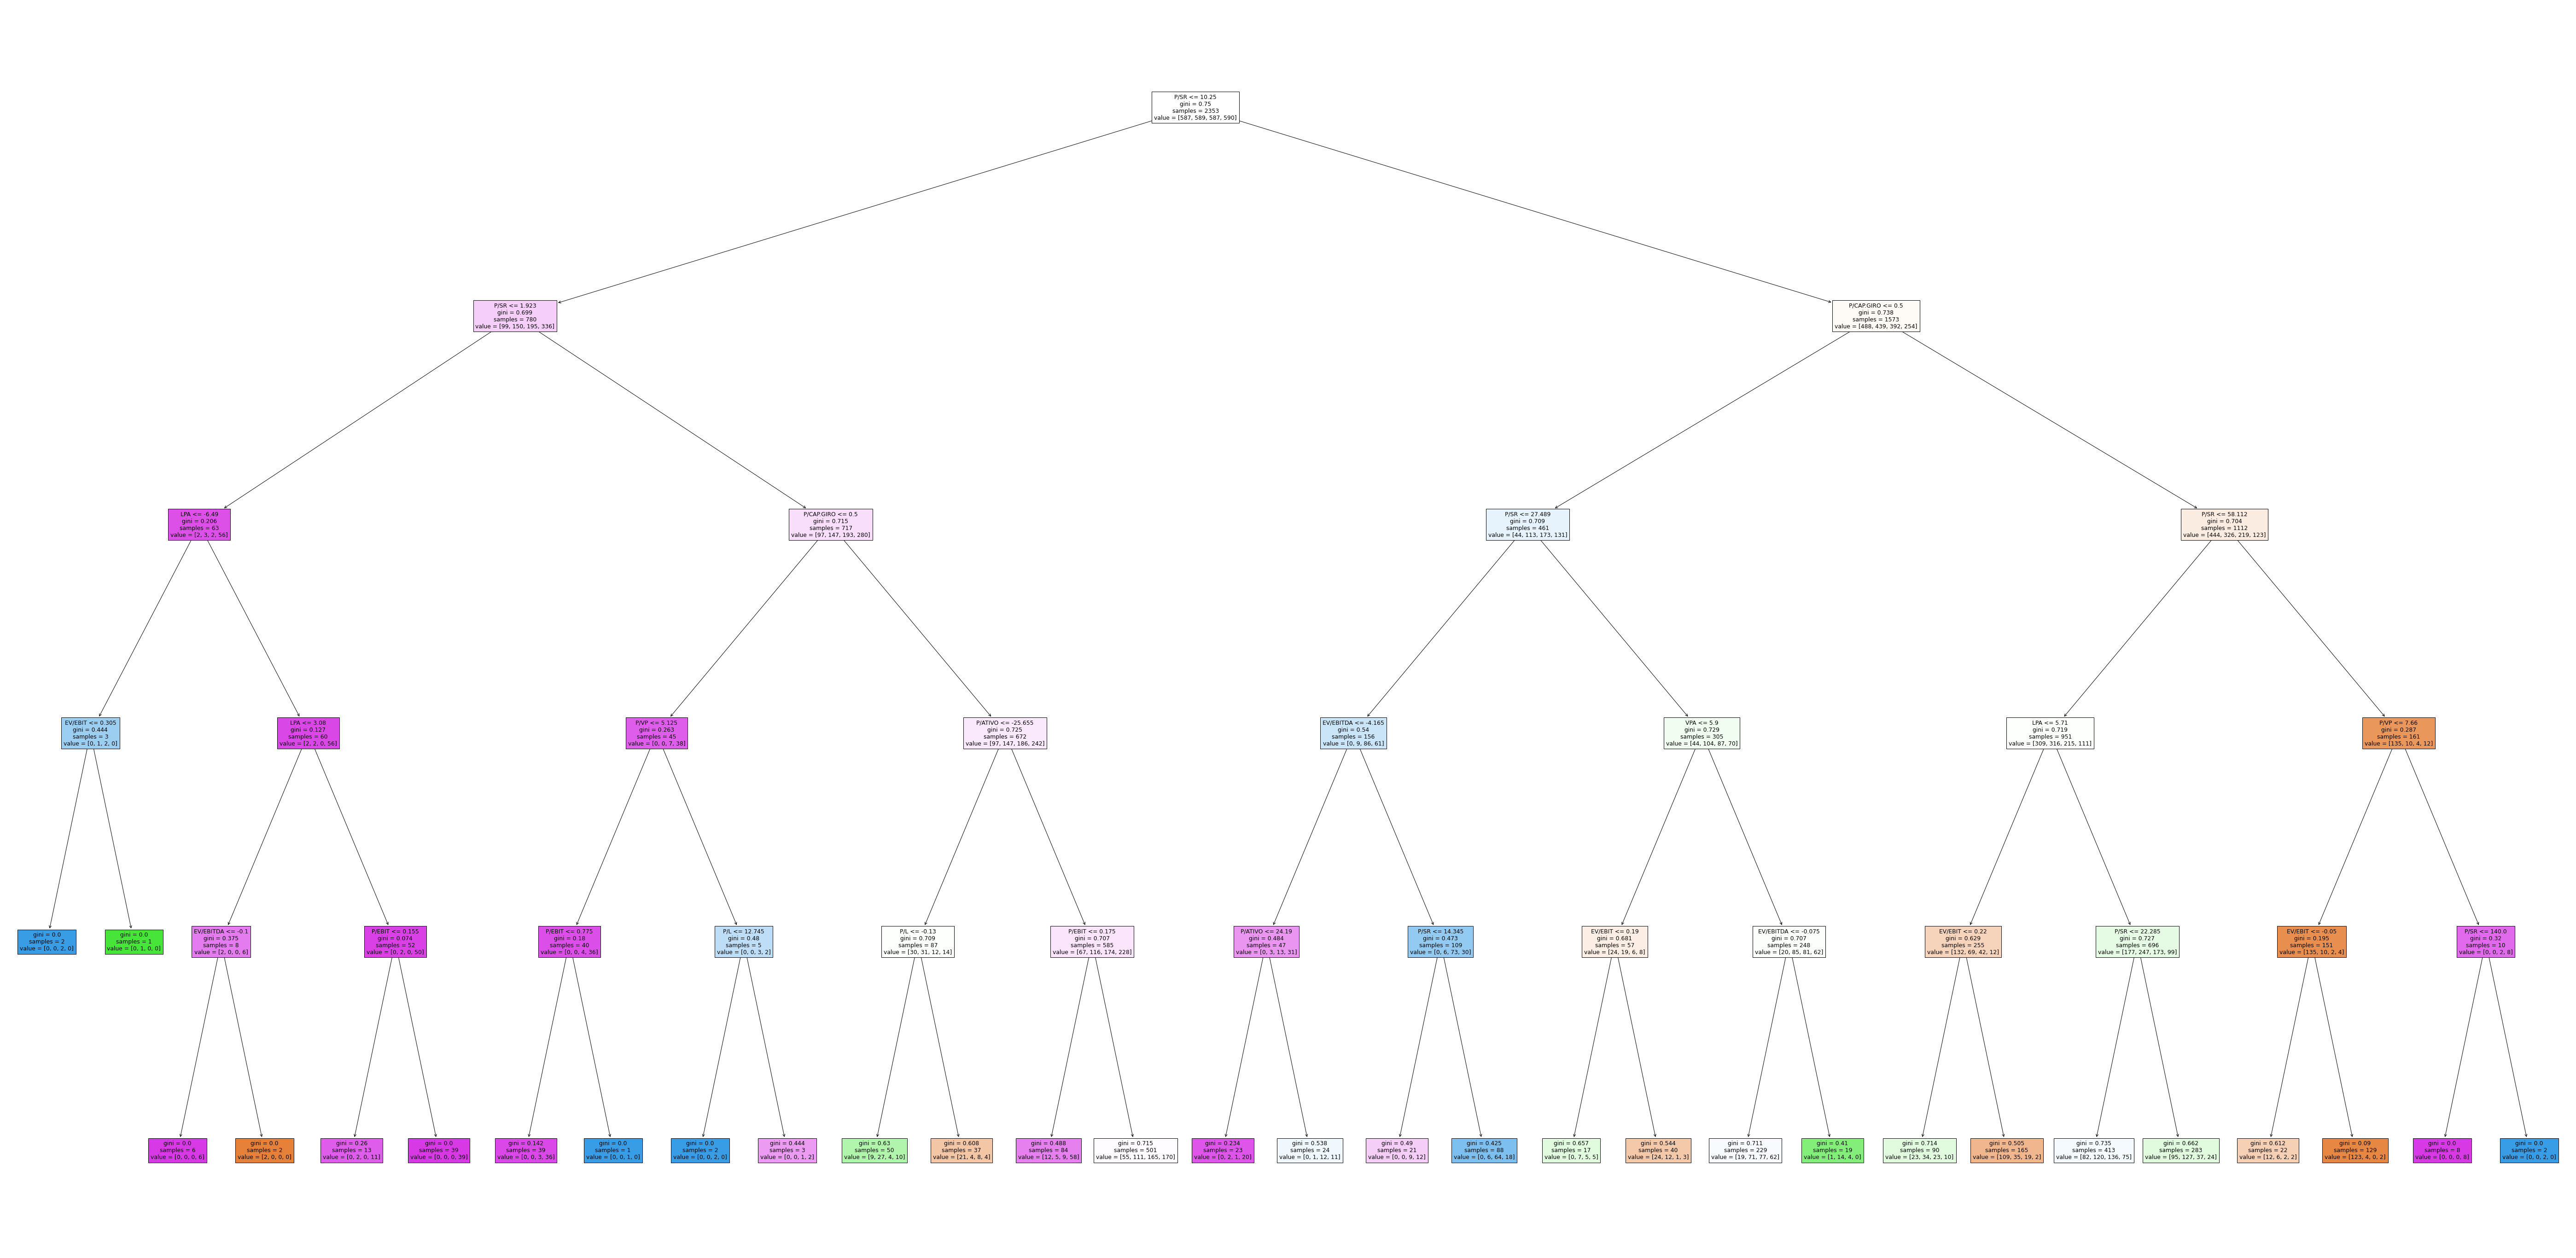

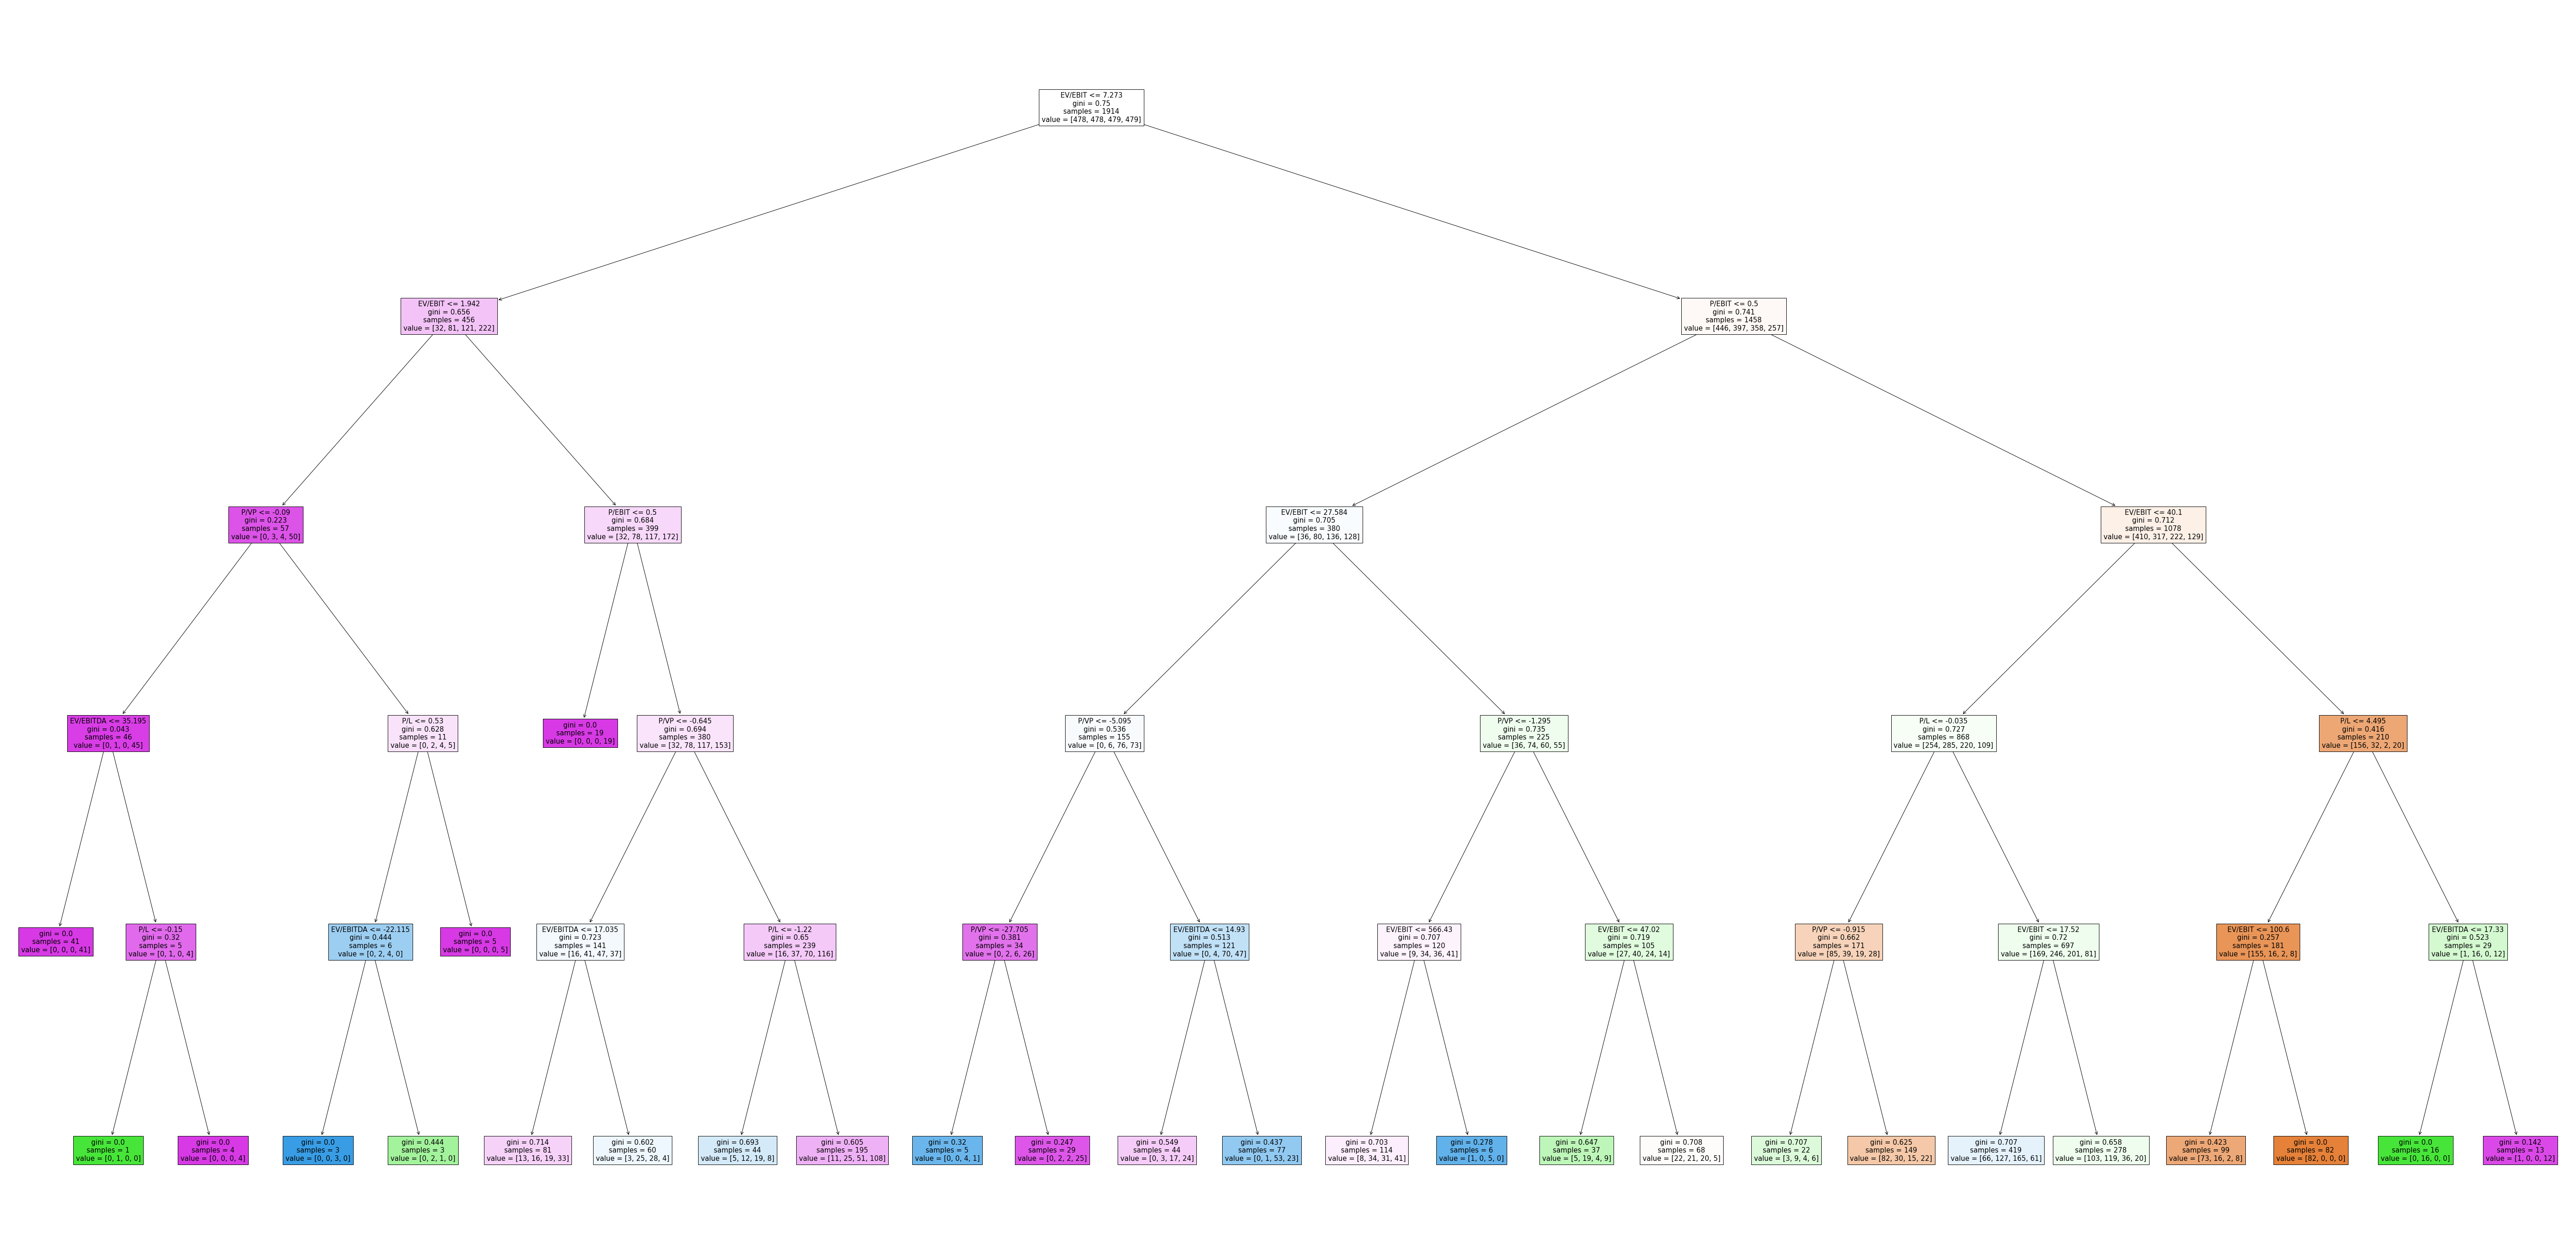

In [19]:
cv_result = []
reports = []
matrices = []
for i in range(1,6):
    x = dfs[i-1].drop('Open_dif_disc', axis=1)
    y = dfs[i-1]['Open_dif_disc']
    rfecv = RFECV(DecisionTreeClassifier(max_depth=5), min_features_to_select=5, cv=5)
    
    x_r = rfecv.fit_transform(x,y)
    
    cv_result.append(cross_validate(DecisionTreeClassifier(), x, y, scoring='accuracy', cv=5))
    
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(x_r,y)
    
    fig = plt.figure(figsize=(100,50))
    _ = plot_tree(tree, 
                       feature_names=x.columns,  
                       filled=True)
    plt.savefig("Trees\\tree_{}.jpeg".format(i), bbox_inches='tight')
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    tree = DecisionTreeClassifier()
    tree.fit(x_train,y_train)
    y_pred = tree.predict(x_test)
    
    reports.append(classification_report(y_test, y_pred))
    matrices.append(confusion_matrix(y_test, y_pred))

In [20]:
cv_result

[{'fit_time': array([0.09531116, 0.10136628, 0.0950489 , 0.09528995, 0.09857893]),
  'score_time': array([0.00300312, 0.00430489, 0.00200009, 0.00199842, 0.00198936]),
  'test_score': array([0.62206333, 0.62206333, 0.64555669, 0.63190184, 0.62985685])},
 {'fit_time': array([0.06593776, 0.06100106, 0.06300068, 0.07563996, 0.06267166]),
  'score_time': array([0.00200057, 0.00199986, 0.00500774, 0.00100136, 0.0010016 ]),
  'test_score': array([0.63978495, 0.66666667, 0.68548387, 0.69179004, 0.66621803])},
 {'fit_time': array([0.04424047, 0.04268932, 0.04493523, 0.04365873, 0.05952644]),
  'score_time': array([0.00200129, 0.00200129, 0.00200391, 0.00100183, 0.00224638]),
  'test_score': array([0.73440285, 0.69821429, 0.725     , 0.73928571, 0.73392857])},
 {'fit_time': array([0.0377624 , 0.03457141, 0.03561401, 0.0382669 , 0.03445673]),
  'score_time': array([0.00201321, 0.00100088, 0.00199962, 0.0019958 , 0.00199652]),
  'test_score': array([0.7537155 , 0.72186837, 0.71549894, 0.81489362,

In [21]:
i = 1
for report in reports:
    print("YEAR {}".format(i))
    print(report)
    i+=1

YEAR 1
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72       361
         1.0       0.60      0.57      0.58       376
         2.0       0.53      0.53      0.53       374
         3.0       0.55      0.57      0.56       357

    accuracy                           0.60      1468
   macro avg       0.60      0.60      0.60      1468
weighted avg       0.60      0.60      0.60      1468

YEAR 2
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       263
         1.0       0.65      0.59      0.62       276
         2.0       0.56      0.63      0.60       284
         3.0       0.67      0.67      0.67       293

    accuracy                           0.67      1116
   macro avg       0.67      0.67      0.67      1116
weighted avg       0.67      0.67      0.67      1116

YEAR 3
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77       212


In [22]:
i = 1
for matrix in matrices:
    print("YEAR {}".format(i))
    print("0 | {}".format(matrix[0]))
    print("1 | {}".format(matrix[1]))
    print("2 | {}".format(matrix[2]))
    print("3 | {}\n".format(matrix[3]))
    i+=1

YEAR 1
0 | [261  46  24  30]
1 | [ 40 216  73  47]
2 | [ 39  50 197  88]
3 | [ 21  51  81 204]

YEAR 2
0 | [205  22  24  12]
1 | [ 22 163  58  33]
2 | [ 13  42 180  49]
3 | [ 17  24  57 195]

YEAR 3
0 | [158  23  15  16]
1 | [ 25 125  29  14]
2 | [ 13  32 144  38]
3 | [  5  22  38 144]

YEAR 4
0 | [136  23  15   7]
1 | [ 12 123  25  12]
2 | [ 13  23 127  27]
3 | [  5  11  18 129]

YEAR 5
0 | [137  12   4   7]
1 | [14 90 19 13]
2 | [  6   5 106  31]
3 | [  3  10  10 108]

